<a href="https://colab.research.google.com/github/AswiniSivadasan/DSA_Assignments/blob/main/Aswini_Classification_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
#load dataset
data = pd.read_excel('/content/iris.xls')

In [22]:
#to find the head of the dataset
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
#to find the column names
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [24]:
#to find the statistics of dataset
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
#to find the shape of column
data.shape

(150, 5)

In [26]:
#to find information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [27]:
#to find the null values
data.isnull()

,SL,SW,PL,PW,Classification
0,False,False,False,False,False
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,True,False,False
148,False,False,False,False,False


In [28]:
# mean of entire dataframe
mean_value = data.mean()
mean_imputation = data.fillna(mean_value)
mean_imputation.head()

<ipython-input-28-6e7b4f860b0a>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_value = data.mean()


,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [29]:
#filling the columns having null values with the mean
data['SL']=data['SL'].fillna(data['SL'].mean())
data['SW']=data['SW'].fillna(data['SW'].mean())
data['PL']=data['PL'].fillna(data['PL'].mean())

In [30]:
# to check whether null values are filled .So again taking information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


KNN ALGORITHM

In [34]:
# Split the data into training and testing sets
X = data.drop('Classification', axis=1)  # Features
y = data['Classification']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Create and train the KNN model
k = 3  # Number of neighbors (you can choose an appropriate value)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
# Make predictions
y_pred = knn.predict(X_test)

In [47]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9666666666666667


SVM ALGORITHM

In [38]:
# Assuming your target variable is in a column named 'target'
X = data.drop('Classification', axis=1)
y = data['Classification']


In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
#Create an SVM model and train it on the training data.
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)


SVC()

In [42]:
#Make predictions on the test data:
y_pred = svm_model.predict(X_test)

In [48]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9666666666666667


DECISION TREE ALGORITHM

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [54]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [55]:
y_pred = clf.predict(X_test)


In [67]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


RANDOM FOREST ALGORITHM

In [68]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [69]:
y_pred = rf_classifier.predict(X_test)


In [70]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


LOGISTIC REGRESSION

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [73]:
y_pred = model.predict(X_test)


In [74]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


To check the accuracy of all models

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print the results
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.2f}")


K-Nearest Neighbors: 0.97
Support Vector Machine: 1.00
Decision Tree: 1.00
Random Forest: 1.00
Logistic Regression: 1.00


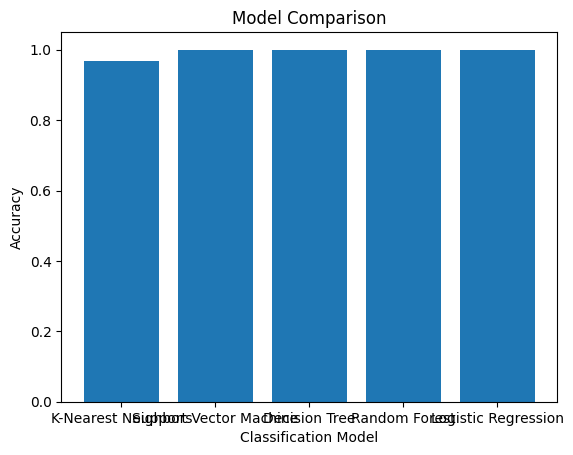

In [79]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values())
plt.xlabel("Classification Model")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()


These models Support Vector Machine,Decision Tree,Random Forest,Logistic
Regression gives the best results.